## Проверка гипотез по увеличению выручки в интернет-магазине

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки крупного интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

План проведения работы:

Шаг 1. [Загрузим данные и подготовим их к анализу](#step1)

Шаг 2. [Приоритизация гипотез](#step2)

Задачи:

    Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Шаг 3. [Анализ A/B-теста](#step3)

Задачи:

    Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
    Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
    Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
    Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    Посчитать точечный график стоимостей заказов. Сделать выводы и предположения.
    Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
    Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Шаг 1. Загрузим данные и подготовим их к анализу<a id="step1"></a> 

In [1]:
#Импортируем библиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Прочитаем файл с гипотезами
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
#Посмотрим общую информацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Посмотрим таблицу
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#Приведем названия столбцов к нижнему регистру 
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
#Прочитаем файл с заказами
orders = pd.read_csv('orders.csv')

In [7]:
#Посмотрим первые 5 строк таблицы
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#Создадим словарь из уникальных пользователей группы А
unique_A = orders.query('group == "A"')['visitorId'].unique()

In [9]:
#Проверим есть ли пользователи, которые присутствуют в двух группах одновременно. Посчитаем.
orders.query('group == "B" and visitorId in @unique_A')['visitorId'].nunique()

58

In [10]:
#Создадим словарь из уникальных пользователей, которые присутствуют в двух группах одновременно.
visitorId_delete = orders.query('group == "B" and visitorId in @unique_A')['visitorId'].unique()

In [11]:
orders['visitorId'].nunique()

1031

In [12]:
#Перезапишем таблицу orders без пользователей, которые присутствуют в двух группах одновременно.
orders = orders.query('visitorId not in @visitorId_delete')

In [13]:
#Найдем количество уникальных пользователей в orders всего и по группам
print('Количество уникальных пользователей', orders['visitorId'].nunique(),\
      '\nКоличество уникальных пользователей в группе А', orders.query('group == "A"')['visitorId'].nunique(),\
      '\nКоличество уникальных пользователей в группе B', orders.query('group == "B"')['visitorId'].nunique())

Количество уникальных пользователей 973 
Количество уникальных пользователей в группе А 445 
Количество уникальных пользователей в группе B 528


In [14]:
#Сравним на сколько группа А меньше группы B
print('{:.2%}'.format(
    1 - (orders.query('group == "A"')['visitorId'].nunique() / orders.query('group == "B"')['visitorId'].nunique()))
     )

15.72%


In [15]:
#Посмотрим общую информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [16]:
#Заменим строковой тип данных на временной
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [17]:
#Посмотрим описательные статистики
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.016000e+03,1.016000e+03,1016,1.016000e+03,1016
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,43,NaN,548
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155085e+09,2.128677e+09,NaN,8.300815e+03,NaN
std,1.234372e+09,1.221578e+09,NaN,4.212199e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.143481e+09,1.043655e+09,NaN,1.190000e+03,NaN


In [18]:
#Прочитаем файл с визитами
visitors = pd.read_csv('visitors.csv')

In [19]:
#Посмотрим общую информацию
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
#Заменим строковой тип данных на временной
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

In [21]:
#Посмотрим первые 5 строк таблицы
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [23]:
#Посмотрим описательные статистики
visitors.describe(include='all')

,date,group,visitors
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-02 00:00:00,B,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000


### Вывод

Есть 3 таблицы с данными для анализа:
1. hypothesis с гипотезами;
2. orders с информацией о заказах;
3. visitors с информацией о визитах.
Таблица hypothesis состоит из 5 столбцов и 9 строк. Есть 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами: Reach, Impact, Confidence, Effort - с оценкой их по 10-бальной шкале. Названия столбцов были приведены к нижнему регистру для исключения вероятности опечаток.

Таблица orders состоит из 5 столбцов и 1016 строк. Тип данных не соответствовал признаку по столбцу "date" и был изменен на временной тип данных. Разброс по выручке большой от 50 до 1294500. Кроме того, в обоих группах были обнаружены одни и те же пользователи и их было 58. Строки с этими пользователями были удалены. В таблице visitors нет ID пользователей, визиты 58 человек из данных нет возможности исключить. Уже при первичном анализе видно, что покупателей в группе А меньше чем в группе В на 15,72%.

Таблица visitors состоит из 3 столбцов и 62 строк. Тип данных не соответствовал признаку по столбцу "date" и был изменен на временной тип данных. 

Во всех трех таблицах пропуски отсутствуют.

### Шаг 2. Приоритизация гипотез<a id="step2"></a> 

In [24]:
#Применим фреймворк ICE для приоритизации гипотез (добавим новый столбец ICE) 
#и отсортируем их по убыванию приоритета
hypothesis['ice'] = (hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [25]:
#Применим фреймворк RICE для приоритизации гипотез (добавим новый столбец (RICE) 
#и отсортируем их по убыванию приоритета
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

### Вывод

Наиболее перспективные гипотезы по ICE:
    - Запустить акцию, дающую скидку на товар в день рождения.
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
Наиболее перспективные гипотезы по RICE:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    - Запустить акцию, дающую скидку на товар в день рождения.
5 приоритетных гипотез по фреймворкам одинаковые, однако места распределились по-разному. Фреймворк ICE не учитывает параметр Reach, то есть оценку количества пользователей, которых затронут изменения. Кроме силы гипотез, важно учитывать и охват пользователей, которых затронут изменения, поэтому тестирование гипотез лучше проводить по очередности в соответствии с распределением мест по фреймворку RICE.

### Шаг 3. Анализ A/B-теста<a id="step3"></a> 

In [26]:
#Создадим массив уникальных пар значений дат и групп теста, удалим дубликаты
dates_group = orders[['date', 'group']].drop_duplicates()
dates_group.head(4)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B


In [27]:
#Объявим новую переменную и получим агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_group.\
apply(lambda x: orders[np.logical_and(orders['date']<=x['date'], orders['group']==x['group'])].\
      agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}),\
      axis=1).sort_values(by=['date', 'group'])
orders_aggregated.head(6)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850


In [28]:
#Объявим новую переменную и получим агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_group.\
apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'], visitors['group']==x['group'])].\
      agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),\
      axis=1).sort_values(by=['date', 'group'])
visitors_aggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


In [29]:
#Объединим кумулятивные данные в одной таблице и присвоим новые названия её столбцам
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [30]:
#Объявим новые переменные, в которых сохраним данные о датах, выручке и числе заказов в группах А и В
cumulativ_revenue_a = cumulative_data.query('group == "A"')[['date', 'revenue', 'orders']]
cumulativ_revenue_b = cumulative_data.query('group == "B"')[['date', 'revenue', 'orders']]

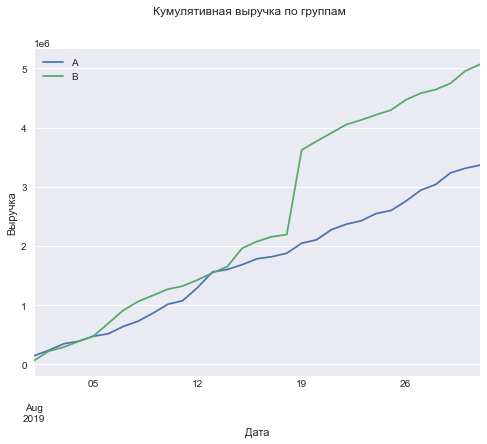

In [31]:
#Построим график кумулятивной выручки по дням и по группам
plt.style.use('seaborn')
ax = cumulativ_revenue_a.plot(x='date', y='revenue', label='A', legend=True, figsize=(8, 6), grid=True)
cumulativ_revenue_b.plot(ax=ax, x='date', y='revenue', label='B', legend=True, figsize=(8, 6), grid=True)
plt.suptitle('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка');

Группа А стабильно хуже по кумулятивной выручке. До середины теста были колебания, но после 18 августа группа В резко увеличила разрыв. Похоже, что в данных присутствуют аномально большие заказы, которые влияют на результаты, или произошло резкое увеличение количества заказов.

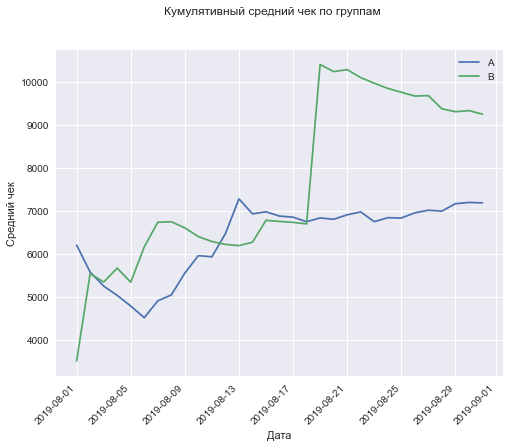

In [32]:
#Построим график кумулятивного среднего чека по группам
plt.figure(figsize=(8, 6))
plt.plot(cumulativ_revenue_a['date'], cumulativ_revenue_a['revenue']/cumulativ_revenue_a['orders'], label='A')
plt.plot(cumulativ_revenue_b['date'], cumulativ_revenue_b['revenue']/cumulativ_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

Кумулятивное значение среднего чека по группам продолжает колебаться, причем по группе А средний чек медленно, но растёт, а по группе В после резкого скачка в середине теста средний чек снижается. Принимать решение по этой метрике рано или требуется анализ выбросов, которые сильно искажают результаты.

In [33]:
#Объединим таблицы cumulativ_revenue_a и cumulativ_revenue_b
merged_cumulative_revenue = cumulativ_revenue_a.merge(
    cumulativ_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


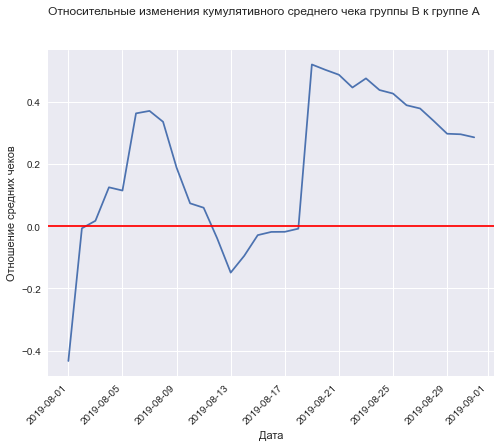

In [34]:
#Построим график относительного изменения кумулятивного среднего чека группы В к группе А
plt.figure(figsize=(8, 6))
plt.plot(merged_cumulative_revenue['date'],\
         (merged_cumulative_revenue['revenue_b'] / \
          merged_cumulative_revenue['orders_b']) / \
         (merged_cumulative_revenue['revenue_a'] / 
          merged_cumulative_revenue['orders_a']) - 1)
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Относительные изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков');

В нескольких точках график резко меняется. Скорей всего в этих датах были совершены аномальные заказы.

In [35]:
#Рассчитаем конверсию, добавим к таблице "cumulative_data" новый столбец
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


In [36]:
#Объявим новые переменные, в которых сохраним данные о заказах в группах А и В
cumulative_data_a = cumulative_data.query('group == "A"')
cumulative_data_b = cumulative_data.query('group == "B"')

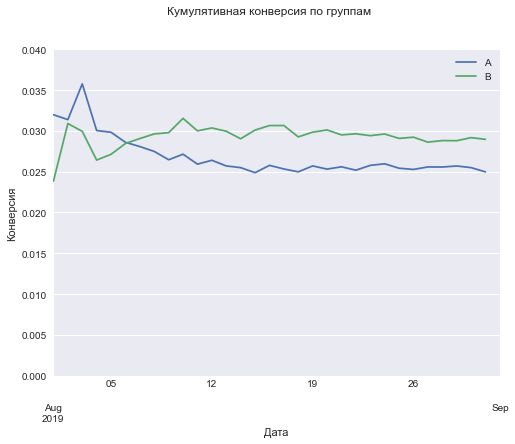

In [37]:
#Построим графики кумулятивной конверсии по группам
ax = cumulative_data_a.plot(x='date', y='conversion', label='A', legend=True, figsize=(8, 6), grid=True)
cumulative_data_b.plot(ax=ax, x='date', y='conversion', label='B', legend=True, figsize=(8, 6), grid=True)
plt.suptitle('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04]);

В начале теста группа А имела большую конверсию, но с 6 августа конверсия группы В резко возросла, конверсия группы В сильно просела. После 18 августа метрика по обоим группам относительно стабилизировалась, но выводы делать рано: конверсии обоих групп должны до конца выровниться и зафиксироваться.

In [38]:
#Объединим таблицы cumulative_data_a и cumulative_data_b, оставим столбцы с датой, конверсией групп А и В
merged_cumulative_conversions = cumulative_data_a[['date', 'conversion']].\
merge(cumulative_data_b[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


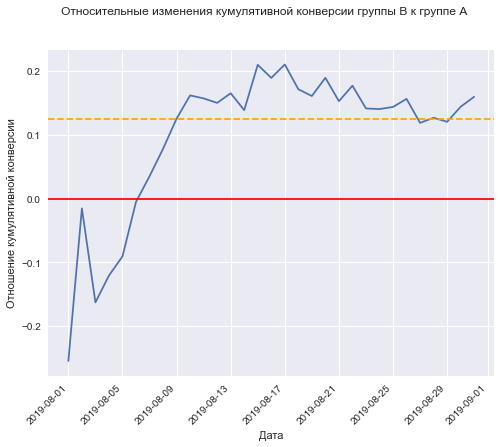

In [39]:
#Построим график относительного изменения кумулятивной конверсии группы В к группе А
plt.figure(figsize=(8, 6))
plt.plot(merged_cumulative_conversions['date'],\
         merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)
plt.axhline(y=0, color='red', linestyle='-')
plt.axhline(y=0.125, color='orange', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Относительные изменения кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии');

В начале теста конверсия группы В была хуже конверсии группы А. После 6 августа группа В резко вырвалась вперед и больше резких скачков отношения конверсии не было. В целом отношение конверсии ещё не установилось, колеблется около значения прироста в 12,5%, и делать какие-то выводы по тесту рано, сначала стоит проанализировать аномалии.

In [40]:
#Создадим новую таблицу со столбцами Id клиентов и количеством заказов, переименуем названия столбцов
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


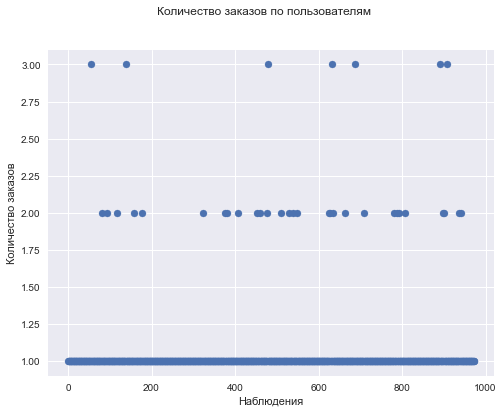

In [41]:
#Построим точечный график количества заказов по пользователям: по оси X - серию из чисел от 0 до количества 
#наблюдений в orders_by_users, по оси Y возьмем значения количества заказов
plt.figure(figsize=(8, 6))
plt.scatter(pd.Series(range(0, len(orders_by_users))), orders_by_users['orders'])
plt.suptitle('Количество заказов по пользователям')
plt.xlabel('Наблюдения')
plt.ylabel('Количество заказов');

За время теста каждый пользователь в основном делал один заказ, есть мало пользователей с двумя заказами и незначительное количество с тремя заказами. Точная доля пользователей с двумя и тремя заказами неизвестна, поэтому проанализируем значения количества заказов по пользователям более детально.

In [42]:
#Посчитаем выборочные перцентили количества заказов на пользователя
np.percentile(orders_by_users['orders'], [90,95,99])

array([1., 1., 2.])

Не более 1% пользователей совершали более двух заказов. Выберем один заказ в качестве границы числа заказов на пользователя.

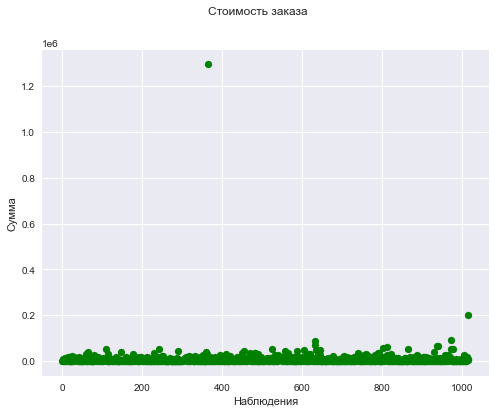

In [43]:
#Построим точечный график стоимостей заказов
plt.figure(figsize=(8, 6))
plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'], color='green')
plt.suptitle('Стоимость заказа')
plt.xlabel('Наблюдения')
plt.ylabel('Сумма');

Сумма практически всех заказов меньше 100000. Однако из-за явно аномальных заказов в районе 200000 и более 1200000, трудно определить границу стоимости обычного заказа пользователя.

In [44]:
#Посчитаем выборочные перцентили стоимости дорогих заказов
np.percentile(orders['revenue'], [90,95,99])

array([17990., 26785., 53904.])

In [45]:
#Посчитаем выборочные перцентили стоимости дешёвых заказов
np.percentile(orders['revenue'], [10,5,1])

array([465., 300., 100.])

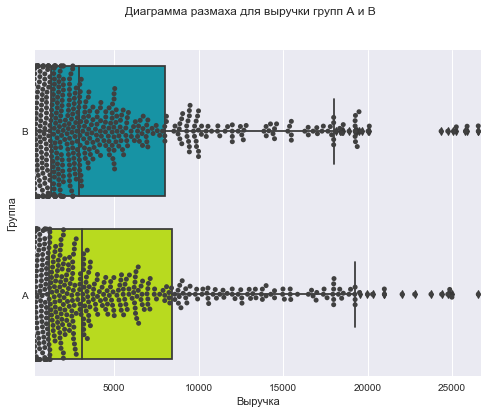

In [46]:
#Построим диаграмму размаха для выручки по группам
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data = orders, x = orders['revenue'], y = orders['group'], palette = 'nipy_spectral')
plt.xlim(300, 26725)
ax = sns.swarmplot(data = orders, x = orders['revenue'], y = orders['group'], color = ' .25')
plt.suptitle('Диаграмма размаха для выручки групп А и В')
plt.xlabel('Выручка')
plt.ylabel('Группа');

Медианная выручка заказа группы А больше группы В, но не на много, и оба датасета скошены вправо. В обоих группах есть перспективы увеличения выручки.

Не более 5% заказов дороже 26785 и дешевле 300 и не более 1% дороже 53904 и дешевле 100. Примем за аномальные заказы, заказы тех пользователей, которые совершили заказ на сумму более 26785 и на сумму менее 300.

In [47]:
#Создадим переменные orders_by_users_a и orders_by_users_b для группы А и группы В с двумя столбцами,  
#в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Переименуем столбцы.
orders_by_users_a = orders.query('group == "A"').groupby('visitorId', as_index=False).\
agg({'transactionId': 'nunique'})
orders_by_users_a.columns = ['user_id', 'orders']
orders_by_users_b = orders.query('group == "B"').groupby('visitorId', as_index=False).\
agg({'transactionId': 'nunique'})
orders_by_users_b.columns = ['user_id', 'orders']

In [48]:
#Создадим переменные visitors_a и visitors_b для групп А и В, где сохраним дату и количество пользователей 
#в эту дату. Переименуем столбцы.
visitors_a = visitors.query('group == "A"')[['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_a']
visitors_b = visitors.query('group == "B"')[['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_b']

In [49]:
#Создадим переменные sample_a и sample_b для групп А и В, где каждый элемент - число заказов 
#определенного пользователя, число элементов - количество пользователей, сумма всех элементов - количество заказов
sample_a = pd.concat(
    [orders_by_users_a['orders'], 
    pd.Series(0, index=np.arange(visitors_a['visitors_a'].sum()-len(orders_by_users_a['orders'])), name='orders')],
    axis=0
)
sample_b = pd.concat(
    [orders_by_users_b['orders'], 
    pd.Series(0, index=np.arange(visitors_b['visitors_b'].sum()-len(orders_by_users_b['orders'])), name='orders')],
    axis=0
)

Сформулируем нулевую гипотезу: статистически значимых различий в конверсии между группами нет. Альтернативная: статистически значимые различия в конверсии между группами есть. Уровень значимости выберем 5%.

In [50]:
#Воспользуемся непараметрическим тестом Манна-Уитни
results = st.mannwhitneyu(sample_a, sample_b)
print('p-значение', '{0:.5f}'.format(results.pvalue))
alpha =  .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.00551
Отвергаем нулевую гипотезу: статистически значимые различия в конверсии между группами есть.


In [51]:
#Посчитаем относительный прирост конверсии группы В
print('{0:.2%}'.format(sample_b.mean()/sample_a.mean()-1))

15.98%


Анализ "сырых" данных показал, что статистически значимые различия в конверсии между группами есть. Относительный прирост конверсии группы B к конверсии группы А равен 15,98%.

Сформулируем нулевую гипотезу: статистически значимых различий в среднем чеке между группами нет. Альтернативная: статистически значимые различия в среднем чеке между группами есть. Уровень значимости выберем 5%.

In [52]:
#Воспользуемся непараметрическим тестом Манна-Уитни
results = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])
print('p-значение', '{0:.5f}'.format(results.pvalue))
alpha =  .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.41475
Не получилось отвергнуть нулевую гипотезу


In [53]:
#Посчитаем относительные различия в среднем чеке между группами
print('{0:.2%}'.format(
    orders.query('group == "B"')['revenue'].mean()/orders.query('group == "A"')['revenue'].mean()-1)
     )

28.66%


Распределение значений не нормальное, поэтому не смотря на то что относительные различия в среднем чеке и составляют 28,66% между группами B и А, можно сказать с  41,45% долей вероятности на основании непараметрического теста Манна-Уитни, что статистически значимых различий между средними чеками двух групп нет. Возможно в группе B больше аномальных больших заказов чем в группе А, поэтому средний чек и завышен по группе В.

In [54]:
#Сделаем срезы пользователей с числом заказов больше 1 в группах А и В, объединим их
users_with_many_orders = pd.concat(
    [orders_by_users_a.query('orders > 1')['user_id'], orders_by_users_b.query('orders > 1')['user_id']], axis=0
)

In [55]:
#Объединим пользователей с числом заказов больше 1 и пользователей, совершивших заказ свыше 26785 и ниже 300.
#Удалим дубликаты и посчитаем аномальных пользователей.
abnormal_users = pd.concat(
    [users_with_many_orders, orders.query('revenue > 26785')['visitorId'],\
     orders.query('revenue < 300')['visitorId']], axis=0
).drop_duplicates()
abnormal_users.shape[0]

127

In [56]:
#Создадим переменные sample_a_new и sample_b_new для групп А и В без аномальных пользователей,
#где каждый элемент - число заказов определенного пользователя
sample_a_new = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
     pd.Series(0, index=np.arange(visitors_a['visitors_a'].sum()-len(orders_by_users_a['orders'])), name='orders')],
    axis=0
)
sample_b_new = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
     pd.Series(0, index=np.arange(visitors_b['visitors_b'].sum()-len(orders_by_users_b['orders'])), name='orders')],
    axis=0
)

In [57]:
#Рассчитаем статистическую значимость различий в конверсии между группами по "очищенным" данным
#Применим статистический критерий Манна-Уитни к sample_a_new и sample_b_new
print('{0:.5f}'.format(st.mannwhitneyu(sample_a_new,sample_b_new)[1]))

0.00886


In [58]:
#Посчитаем относительный прирост конверсии группы В
print('{0:.2%}'.format(sample_b_new.mean()/sample_a_new.mean()-1))

17.54%


Тест показал, что статистически значимые различия в конверсии между группами по "очищенным" данным есть. Результаты изменились не на много, но в большую сторону.

In [59]:
#Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным
#Применим статистический критерий Манна-Уитни
print('{0:.5f}'.format(
    st.mannwhitneyu(orders.query('group == "A" and (visitorId not in @abnormal_users)')['revenue'],
                    orders.query('group == "B" and (visitorId not in @abnormal_users)')['revenue'])[1])
     )

0.34383


In [60]:
#Посчитаем относительные различия в среднем чеке между группами
print('{0:.2%}'.format(
    orders.query('group == "B" and (visitorId not in @abnormal_users)')['revenue'].mean()/
    orders.query('group == "A" and (visitorId not in @abnormal_users)')['revenue'].mean()-1)
     )

-3.48%


Анализ "очищенных" данных показал, что нет статистически значимых различий между средними чеками двух групп с 34,38% долей вероятности, p-value уменьшился. При этом разница между значениями среднего чека сильно сократилась и средний чек группы В стал ниже среднего чека группы А на 3,48%.

Рассчитаем метрики и построим графики по "очищенным" данным.

In [61]:
#Запишем таблицу orders без аномальных пользователей
orders_new = orders[~orders['visitorId'].isin(abnormal_users)]

In [62]:
#Объявим новую переменную и получим агрегированные кумулятивные по дням данные о заказах без аномальных пользователей
orders_aggregated_new = dates_group.\
apply(lambda x: orders_new[np.logical_and(orders_new['date']<=x['date'], orders_new['group']==x['group'])].\
      agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}),\
      axis=1).sort_values(by=['date', 'group'])
orders_aggregated.tail(6)

,date,group,transactionId,visitorId,revenue
532,2019-08-29,A,451,430,3233233
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656
930,2019-08-31,B,548,528,5068972


In [63]:
#Объединим кумулятивные данные в одной таблице и присвоим новые названия её столбцам без аномальных пользователей
cumulative_data_new = orders_aggregated_new.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data_new.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,13,13,31869,719
1,2019-08-01,B,16,16,59586,713
2,2019-08-02,A,25,25,77795,1338
3,2019-08-02,B,33,33,144350,1294
4,2019-08-03,A,49,49,190268,1845


In [64]:
#Объявим новые переменные, в которых сохраним данные о датах, выручке и числе заказов в группах А и В,
# без аномальных пользователей
cumulativ_revenue_a_new = cumulative_data_new.query('group == "A"')[['date', 'revenue', 'orders']]
cumulativ_revenue_b_new = cumulative_data_new.query('group == "B"')[['date', 'revenue', 'orders']]

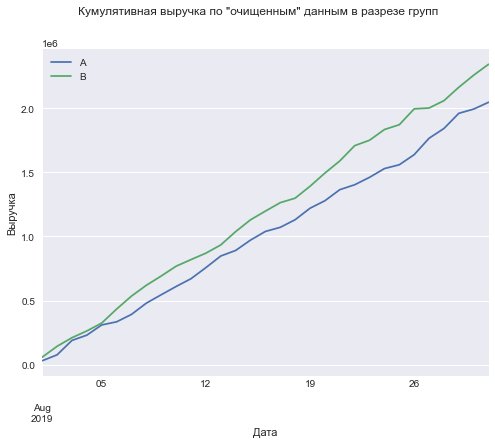

In [65]:
#Построим график кумулятивной выручки по дням и по группам без аномальных пользователей
ax = cumulativ_revenue_a_new.plot(x='date', y='revenue', label='A', legend=True, figsize=(8, 6), grid=True)
cumulativ_revenue_b_new.plot(ax=ax, x='date', y='revenue', label='B', legend=True, figsize=(8, 6), grid=True)
plt.suptitle('Кумулятивная выручка по "очищенным" данным в разрезе групп')
plt.xlabel('Дата')
plt.ylabel('Выручка');

Группа В стабильно больше по выручке и по "очищенным" данным, нет скачков.

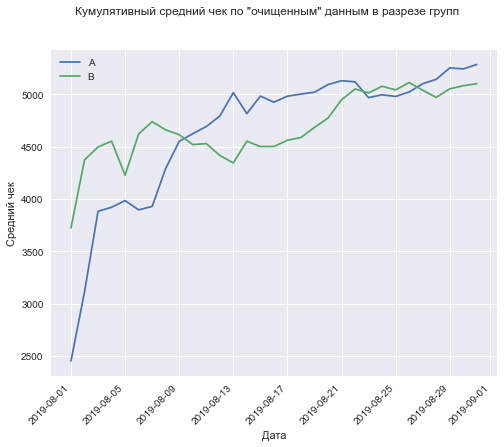

In [66]:
#Построим график кумулятивного среднего чека по группам без аномальных пользователей
plt.figure(figsize=(8, 6))
plt.plot(
    cumulativ_revenue_a_new['date'],
    cumulativ_revenue_a_new['revenue']/cumulativ_revenue_a_new['orders'],
    label='A'
)
plt.plot(
    cumulativ_revenue_b_new['date'],
    cumulativ_revenue_b_new['revenue']/cumulativ_revenue_b_new['orders'],
    label='B'
)
plt.legend()
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Кумулятивный средний чек по "очищенным" данным в разрезе групп')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

Кумулятивное значение среднего чека по группам так же продолжает колебаться. Зато ушли сильные скачки группы В. Но делать выводы по этой метрике как прежде рано.

In [67]:
#Объединим таблицы cumulativ_revenue_a_new и cumulativ_revenue_b_new
merged_cumulative_revenue_new = cumulativ_revenue_a_new.merge(
    cumulativ_revenue_b_new, left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)

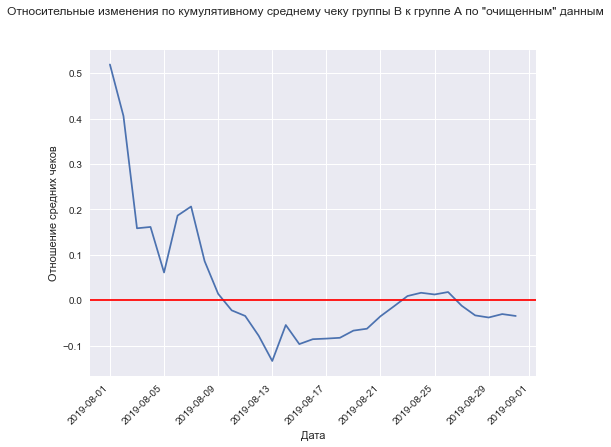

In [68]:
#Построим график относительного изменения кумулятивного среднего чека группы В к группе А без аномальных пользователей
plt.figure(figsize=(8, 6))
plt.plot(merged_cumulative_revenue_new['date'],\
         (merged_cumulative_revenue_new['revenue_b'] / \
          merged_cumulative_revenue_new['orders_b']) / \
         (merged_cumulative_revenue_new['revenue_a'] / \
          merged_cumulative_revenue_new['orders_a']) - 1)
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Относительные изменения по кумулятивному среднему чеку группы В к группе А по "очищенным" данным')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков');

График сильно изменился после удаления аномальных пользователей, теперь по графику четко видно, что отношение среднего чека группы В к среднему чеку группы А продолжает колебаться.

In [69]:
#Рассчитаем конверсию, добавим к таблице "cumulative_data_new" новый столбец
cumulative_data_new['conversion'] = cumulative_data_new['orders'] / cumulative_data_new['visitors']

In [70]:
#Объявим новые переменные, в которых сохраним данные о заказах в группах А и В без аномальных пользователей
cumulative_data_a_new = cumulative_data_new.query('group == "A"')
cumulative_data_b_new = cumulative_data_new.query('group == "B"')

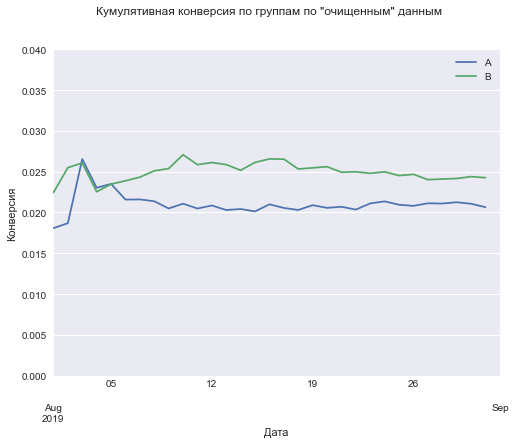

In [71]:
#Построим графики кумулятивной конверсии по группам без аномальных пользователей
ax = cumulative_data_a_new.plot(x='date', y='conversion', label='A', legend=True, figsize=(8, 6), grid=True)
cumulative_data_b_new.plot(ax=ax, x='date', y='conversion', label='B', legend=True, figsize=(8, 6), grid=True)
plt.suptitle('Кумулятивная конверсия по группам по "очищенным" данным')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04]);

Конверсия группы B по-прежнему больше конверсии А, конверсии постепенно выравниваются и фиксируются.

In [72]:
#Объединим таблицы cumulative_data_a_new и cumulative_data_b_new, оставим столбцы с датой, конверсией групп А и В
merged_cumulative_conversions_new = cumulative_data_a_new[['date', 'conversion']].\
merge(
    cumulative_data_b_new[['date', 'conversion']],
    left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)
merged_cumulative_conversions_new.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.018081,0.022440
1,2019-08-02,0.018685,0.025502
2,2019-08-03,0.026558,0.026068
3,2019-08-04,0.023029,0.022542
4,2019-08-05,0.023508,0.023476


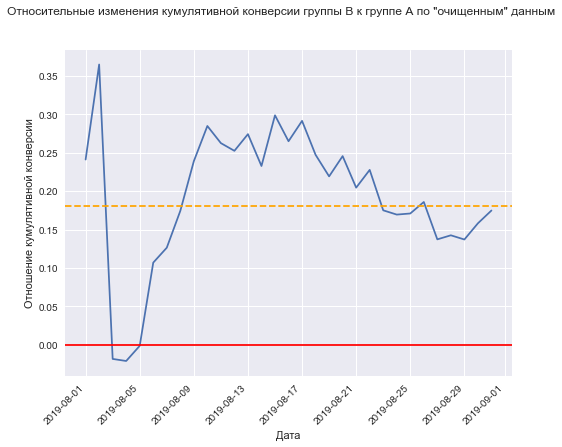

In [73]:
#Построим график относительного изменения кумулятивной конверсии группы В к группе А без аномальных пользователей
plt.figure(figsize=(8, 6))
plt.plot(merged_cumulative_conversions_new['date'],\
         merged_cumulative_conversions_new['conversion_b']/merged_cumulative_conversions_new['conversion_a']-1)
plt.axhline(y=0, color='red', linestyle='-')
plt.axhline(y=0.18, color='orange', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right')
plt.suptitle('Относительные изменения кумулятивной конверсии группы В к группе А по "очищенным" данным')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии');

После удаления аномальных пользователей группа В по-прежнему лидирует по конверсии, но отношение конверсии группы В продолжает колебания примерно около 18% относительно конверсии группы А.

### Вывод

В ходе предобработки данных были обнаружены 58 пользователей, которые присутствуют в обоих группах, из этого можно сделать вывод, что А/А тест был проведен с нарушениями: инструмент деления трафика работает с ошибками. 58 пользователей составляют около 6% всех уникальных пользователей таблицы с заказами, оценить количество подобных пользователей и удалить их из таблицы с визитами не представляется возможным из-за отсутствия в ней id клиентов. Поэтому результаты, проведенного теста  нельзя интерпретировать однозначно.

В работе было приоритизировано 10 гипотез, 5 из них оказались приоритетными по фреймворкам ICE и RICE. Так как цель приоритизации гипотез - увеличение выручки интернет-магазина, нам важно дополнительно получить охват пользователей, поэтому первой стоит протестировать гипотезу: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

По анализу, проведенного теста, имеются следующие результаты:
- Статистически значимое различие по конверсии между группами есть как по "сырым" данным, так и по данным без аномальных выбросов.
- Как по графику, так и по данным видно, что результаты по конверсии группы А хуже чем у группы В. Отношение конверсии группы В к конверсии группе А не до конца зафиксировалось и составляет по выборке около 18%.
- Выручка группы В зафиксировалась выше группы А.
- Нет статистически значимого различия по среднему чеку между группами как по "сырым" данным, так и по данным без аномальных выбросов с вероятностью 34,38%. Но возможно исходя из остальных данных, здесь кроется ложнонегативный результат. И эта выборка не репрезентативна по среднему чеку.
- Средний чек по группам отличается не значительно после удаления явно аномальных выбросов. При этом результаты группы В по среднему чеку после удаления выбросов хуже и средний чек стал ниже среднего чека группы А. Метрика не стабилизировалась.

Если исходить из того, что тестировалась гипотеза о добавлении формы подписки на сайт, то тест стоит остановить и зафиксировать победу группы В. Не смотря на то что метрика по среднему чеку не ещё не стабилизировалась, выручка группы В стабильно выше группы А за счет хорошего показателя по конверсии. 